# Grid statistics using different $\rho_p$ and $v_p$

Here we use the code outline above to compute and compare the particle velocities field using different $\rho_p$ and $v_p$, and compare it with that binned using particle (as ground truth)


In [7]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [8]:
def json_read(path):
    f = open(path,'r')
    return list2npy(json.load(f))

In [9]:
def list2npy(dictionary):
    for key, val in dictionary.items():
        if type(val) is list:
            dictionary[key] = np.array(dictionary[key])
    return dictionary

In [57]:
def plot_rel_vel(stats,mode='grid',label=None):
    binCenters = stats['binCenters']
    if mode == 'part':
        avgRelVel = stats['velocitySum']/stats['partCounts']
    elif mode == 'grid':
        avgRelVel = stats['velc_sum']
    label = mode if (label is None) else label
    plt.plot(binCenters,avgRelVel,label=label)

In [63]:
def plot_rad_vel(stats,mode='grid',label=None):
    binCenters = stats['binCenters']
    if mode == 'part':
        avgRelVel = stats['velocityRadialSum']/stats['partCounts']
    elif mode == 'grid':
        avgRelVel = stats['velc_rad_sum']
    label = mode if (label is None) else label
    plt.plot(binCenters,avgRelVel,label=label)

In [64]:
particleStats = json_read('./json/RDFVelocityTest-particle.json')
tgt_rhop_tgt_vp = json_read('./json/RDFVelocityTest-1642759763.json')
tgt_rhop_out_vp = json_read('./json/RDFVelocityTest-1642765338.json')
tgt_rhop_rel_vp = json_read('./json/RDFVelocityTest-1642765635.json')
out_rhop_out_vp = json_read('./json/RDFVelocityTest-1642769984.json')
out_rhop_rel_vp = json_read('./json/RDFVelocityTest-1642766122.json')

(0.005, 0.1049992661003662)

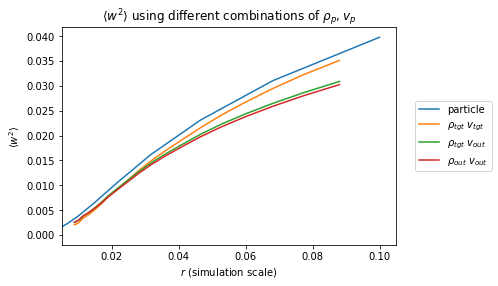

In [65]:
plt.title(r'$\langle w^2\rangle$ using different combinations of $\rho_p,v_p$')
plt.ylabel(r'$\langle w^2\rangle$')
plt.xlabel(r'$r$ (simulation scale)')
plot_rel_vel(particleStats,mode='part',label='particle')
plot_rel_vel(tgt_rhop_tgt_vp,mode='grid',label=r'$\rho_{tgt}$ $v_{tgt}$')
plot_rel_vel(tgt_rhop_out_vp,mode='grid',label=r'$\rho_{tgt}$ $v_{out}$')
#plot_rel_vel(tgt_rhop_rel_vp,mode='grid',label=r'$\rho_{tgt}$ $v_{rel,out}$')
plot_rel_vel(out_rhop_out_vp,mode='grid',label=r'$\rho_{out}$ $v_{out}$')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xlim(5e-3)

(0.005, 0.1049992661003662)

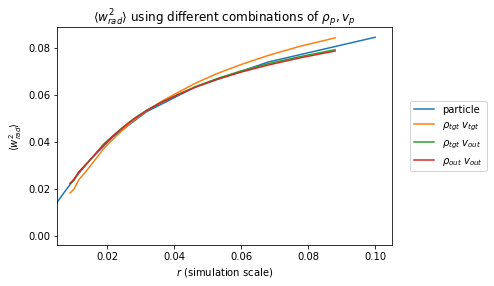

In [67]:
plt.title(r'$\langle w^2_{rad}\rangle$ using different combinations of $\rho_p,v_p$')
plt.ylabel(r'$\langle w^2_{rad}\rangle$')
plt.xlabel(r'$r$ (simulation scale)')
plot_rad_vel(particleStats,mode='part',label='particle')
plot_rad_vel(tgt_rhop_tgt_vp,mode='grid',label=r'$\rho_{tgt}$ $v_{tgt}$')
plot_rad_vel(tgt_rhop_out_vp,mode='grid',label=r'$\rho_{tgt}$ $v_{out}$')
#plot_rel_vel(tgt_rhop_rel_vp,mode='grid',label=r'$\rho_{tgt}$ $v_{rel,out}$')
plot_rad_vel(out_rhop_out_vp,mode='grid',label=r'$\rho_{out}$ $v_{out}$')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.xlim(5e-3)